In [43]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
df = pd.read_csv('SXM+survey.csv',encoding = 'unicode_escape')

In [334]:
df.head(5)

,StartDatev1,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,...,study,PID,psid,med,K2,rid,RISN,term,gc,Category
0,11/13/18,11/13/2018 17:23,11/13/2018 17:23,1,,100,5,1,11/13/2018 17:23,R_3Gw6W2vxE07om9K,...,,,,,,,,age,2.0,
1,11/13/18,11/13/2018 17:23,11/13/2018 17:23,1,,100,7,1,11/13/2018 17:23,R_2pY2BkzCgSJ8qJF,...,,,,,,,,failed S2,2.0,
2,11/14/18,11/14/2018 8:54,11/14/2018 8:54,1,,100,29,1,11/14/2018 8:54,R_3CWs2PmY2cdWwzs,...,,,,,,,,age,2.0,
3,11/14/18,11/14/2018 13:06,11/14/2018 13:06,0,71.212.17.25,100,10,1,11/14/2018 13:06,R_1f92cLwy617YmGl,...,,,,{Invalid Expression},,5bec8046-f89d-46d2-b438-fa7f7fad6320,3342850,audio_content_type,2.0,
4,11/14/18,11/14/2018 13:06,11/14/2018 13:07,0,12.207.172.164,100,42,1,11/14/2018 13:07,R_2rpi7fWLJ4HVOUX,...,,,,{Invalid Expression},,5bec8045-1148-4584-b8fd-07ceaf3c09f0,3342850,No_subscription,2.0,


In [185]:
 v2_2_2 = pd.DataFrame(columns=['variable','currently pay','someone else pay','currently in trial','it is free'])

In [120]:
columns = ['A2.2_1','A2.2_2','A2.2_3','A2.2_4','A2.2_5','A2.2_6','A2.2_7','A2.2_8','A2.2_9','A2.2_10','A2.2_11','A2.2_12','A2.2_13','A2.2_14','A2.2_15','A2.2_16','A2.2_17','A2.2_18']

In [186]:
for i,j in zip(range(0,18),columns):
    v2_2_2.loc[i,'variable'] = j

In [133]:
for c in df.columns:
    if c in columns:
        df[c]= df[c].apply(pd.to_numeric,errors='coerce')
        

In [192]:
for c,k in zip(range(0,18),columns):
    for j in range(1,5):
        v2_2_2.iloc[c, j] = len(df[(df[k]==j)])

In [193]:
 v2_2_2

,variable,currently pay,someone else pay,currently in trial,it is free
0,A2.2_1,247,58,35,205
1,A2.2_2,112,30,46,414
2,A2.2_3,133,52,30,148
3,A2.2_4,290,39,51,25
4,A2.2_5,220,57,35,46
5,A2.2_6,30,12,7,7
6,A2.2_7,227,55,34,810
7,A2.2_8,777,234,47,19
8,A2.2_9,464,96,42,31
9,A2.2_10,417,111,36,29


In [206]:
v2_3_3 = pd.DataFrame(columns=['variable',0,1,2,3,4,5,6,7,8,9,10])
columns_1 = ['A2.3_1','A2.3_2','A2.3_3','A2.3_4','A2.3_5','A2.3_6','A2.3_7','A2.3_8','A2.3_9','A2.3_10','A2.3_11','A2.3_12','A2.3_13','A2.3_14','A2.3_15','A2.3_16','A2.3_17','A2.3_18']
for i,j in zip(range(0,18),columns_1):
    v2_3_3.loc[i,'variable'] = j

In [201]:
for c in df.columns:
    if c in columns_1:
        df[c]= df[c].apply(pd.to_numeric,errors='coerce')

In [207]:
for c,k in zip(range(0,18),columns_1):
    for j in range(0,11):
        v2_3_3.iloc[c, j+1] = len(df[(df[k]==j)])

In [210]:
v2_3_3

,variable,0,1,2,3,4,5,6,7,8,9,10
0,A2.2_1,2,0,4,5,6,26,17,49,71,101,264
1,A2.2_2,0,1,4,6,16,31,25,50,94,81,294
2,A2.2_3,1,1,1,3,6,19,16,30,46,69,171
3,A2.2_4,0,2,4,3,7,17,12,30,59,86,185
4,A2.2_5,1,2,0,1,7,13,12,24,42,60,196
5,A2.2_6,1,0,0,0,3,2,3,4,6,10,27
6,A2.2_7,1,0,5,7,7,38,40,86,144,191,607
7,A2.2_8,1,1,2,2,6,20,22,63,121,209,630
8,A2.2_9,0,0,2,6,5,25,34,60,83,112,306
9,A2.2_10,2,0,1,2,4,18,15,50,78,108,315


In [209]:
for i,j in zip(range(0,18),columns):
    v2_3_3.loc[i,'variable'] = j

In [219]:
cov =  pd.merge(left=v2_2_2, right=v2_3_3)
cov

,variable,currently pay,someone else pay,currently in trial,it is free,0,1,2,3,4,5,6,7,8,9,10
0,A2.2_1,247,58,35,205,2,0,4,5,6,26,17,49,71,101,264
1,A2.2_2,112,30,46,414,0,1,4,6,16,31,25,50,94,81,294
2,A2.2_3,133,52,30,148,1,1,1,3,6,19,16,30,46,69,171
3,A2.2_4,290,39,51,25,0,2,4,3,7,17,12,30,59,86,185
4,A2.2_5,220,57,35,46,1,2,0,1,7,13,12,24,42,60,196
5,A2.2_6,30,12,7,7,1,0,0,0,3,2,3,4,6,10,27
6,A2.2_7,227,55,34,810,1,0,5,7,7,38,40,86,144,191,607
7,A2.2_8,777,234,47,19,1,1,2,2,6,20,22,63,121,209,630
8,A2.2_9,464,96,42,31,0,0,2,6,5,25,34,60,83,112,306
9,A2.2_10,417,111,36,29,2,0,1,2,4,18,15,50,78,108,315


In [240]:
cov1 = cov.drop(['variable'],axis=1)
cov1 = cov1.apply(pd.to_numeric,errors='coerce')
#cov2 = cov1[['currently pay','someone else pay',1,2,3,4,5,6,7,8,9,10]]
#cov2['totalpay'] = cov2['currently pay'] + cov2['someone else pay']
#cov2 = cov2.drop(['currently pay','someone else pay'],axis=1)
corrMatrix = cov2.corr()
corrMatrix

,currently pay,someone else pay,currently in trial,it is free,0,1,2,3,4,5,6,7,8,9,10
currently pay,1.000000,0.958825,0.597911,-0.222193,0.044066,-0.110172,-0.055127,0.009913,0.144530,0.178777,0.330444,0.456809,0.624297,0.749504,0.681050
someone else pay,0.958825,1.000000,0.532769,-0.176022,0.066302,-0.091798,-0.063799,-0.011592,0.144073,0.174193,0.294692,0.450722,0.609496,0.754117,0.711553
currently in trial,0.597911,0.532769,1.000000,0.037513,-0.326209,-0.227566,0.052771,-0.053324,0.283478,0.066376,0.145746,0.375839,0.538698,0.621150,0.593754
it is free,-0.222193,-0.176022,0.037513,1.000000,0.376566,0.273491,0.764470,0.719858,0.492249,0.695159,0.662228,0.720974,0.595897,0.453498,0.529810
0,0.044066,0.066302,-0.326209,0.376566,1.000000,0.654459,0.659829,0.763990,0.576612,0.797128,0.665761,0.496368,0.346235,0.178626,0.160253
1,-0.110172,-0.091798,-0.227566,0.273491,0.654459,1.000000,0.637383,0.608781,0.534274,0.611929,0.477485,0.283609,0.114447,-0.018775,-0.009401
2,-0.055127,-0.063799,0.052771,0.764470,0.659829,0.637383,1.000000,0.903696,0.632509,0.847078,0.734611,0.739990,0.541433,0.400869,0.415827
3,0.009913,-0.011592,-0.053324,0.719858,0.763990,0.608781,0.903696,1.000000,0.715452,0.953188,0.895745,0.788449,0.596870,0.384137,0.391796
4,0.144530,0.144073,0.283478,0.492249,0.576612,0.534274,0.632509,0.715452,1.000000,0.801945,0.714082,0.587592,0.610063,0.354170,0.380581
5,0.178777,0.174193,0.066376,0.695159,0.797128,0.611929,0.847078,0.953188,0.801945,1.000000,0.941711,0.847397,0.729686,0.522857,0.525145


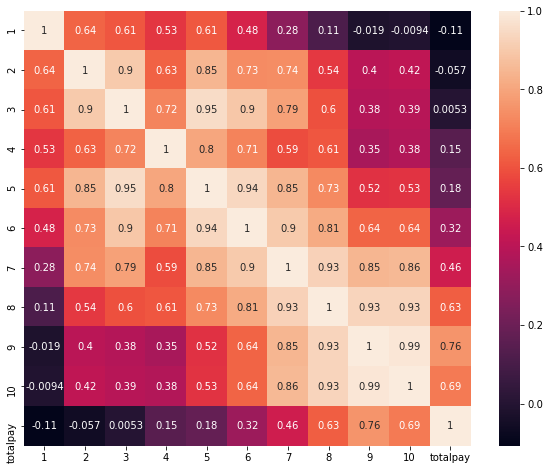

In [251]:
plt.subplots(figsize=(10,8))
sns.heatmap(corrMatrix, annot=True)

In [253]:
v2_5_5 = pd.DataFrame(columns=['variable','tv str','tv cable','movie','online vid','music radio','music stream','podcast','talk radio','other'])
columns_2 = ['A2.5_1','A2.5_2','A2.5_3','A2.5_4','A2.5_5','A2.5_6','A2.5_7','A2.5_8']
for i,j in zip(range(0,8),columns_2):
    v2_5_5.loc[i,'variable'] = j


In [254]:
for c in df.columns:
    if c in columns_2:
        df[c]= df[c].apply(pd.to_numeric,errors='coerce')

In [275]:
for c,k in zip(range(0,8),columns_2):
    for j in range(1,10):
        v2_5_5.iloc[c, j] = len(df[(df[k]==j)])
      

In [276]:
v2_5_5

,variable,tv str,tv cable,movie,online vid,music radio,music stream,podcast,talk radio,other
0,A2.5_1,314,310,46,144,200,251,32,53,3
1,A2.5_2,49,130,32,53,670,384,47,88,19
2,A2.5_3,66,52,91,113,309,429,66,45,16
3,A2.5_4,171,185,73,266,200,454,71,20,19
4,A2.5_5,68,59,22,106,251,678,66,21,20
5,A2.5_6,108,97,78,127,204,590,32,28,13
6,A2.5_7,109,37,168,139,172,453,122,30,33
7,A2.5_8,82,27,49,77,249,312,48,40,33


In [277]:
v2_6_6 = pd.DataFrame(columns=['variable','under 30min','30-60min','1-3hrs','3+hrs','n/a'])
columns_3 = ['A2.6_1','A2.6_2','A2.6_3','A2.6_4','A2.6_5','A2.6_6','A2.6_7','A2.6_8']
for i,j in zip(range(0,8),columns_3):
    v2_6_6.loc[i,'variable'] = j

In [279]:
for c in df.columns:
    if c in columns_3:
        df[c]= df[c].apply(pd.to_numeric,errors='coerce')

In [280]:
for c,k in zip(range(0,8),columns_3):
    for j in range(1,6):
        v2_6_6.iloc[c, j] = len(df[(df[k]==j)])
v2_6_6

,variable,under 30min,30-60min,1-3hrs,3+hrs,n/a
0,A2.6_1,618,505,173,73,172
1,A2.6_2,547,612,233,67,82
2,A2.6_3,167,282,346,391,355
3,A2.6_4,176,458,592,245,70
4,A2.6_5,237,566,371,77,290
5,A2.6_6,157,280,507,340,257
6,A2.6_7,155,279,471,314,322
7,A2.6_8,89,145,257,298,752


In [282]:
v2_7_7 = pd.DataFrame(columns=['variable','i knw excatly i am lking for','i find the right content to fit my mood','i like to explore until something catches my eye','i seek out something new or recommended to me','i have a list or queue that i keep up with','i just play whatever is on or comes up','i use a randomize option','other'])
columns_4 = ['A2.7_1','A2.7_2','A2.7_3','A2.7_4','A2.7_5','A2.7_6','A2.7_7','A2.7_8']
for i,j in zip(range(0,8),columns_4):
    v2_7_7.loc[i,'variable'] = j

In [283]:
for c in df.columns:
    if c in columns_4:
        df[c]= df[c].apply(pd.to_numeric,errors='coerce')

In [291]:
for c,k in zip(range(0,8),columns_4):
    for j in range(1,9):
        v2_7_7.iloc[c, j] = len(df[(df[k]==j+162)])
v2_7_7

,variable,i knw excatly i am lking for,i find the right content to fit my mood,i like to explore until something catches my eye,i seek out something new or recommended to me,i have a list or queue that i keep up with,i just play whatever is on or comes up,i use a randomize option,other
0,A2.7_1,701,351,106,53,67,75,32,2
1,A2.7_2,483,438,157,75,127,134,50,1
2,A2.7_3,375,276,188,94,132,108,62,10
3,A2.7_4,399,400,184,163,131,103,91,6
4,A2.7_5,422,288,115,90,219,80,65,5
5,A2.7_6,336,252,145,151,124,185,114,10
6,A2.7_7,386,242,170,106,155,97,110,6
7,A2.7_8,234,207,88,60,77,64,68,19


In [373]:
import datetime
df['EndDate']= pd.to_datetime(df['EndDate'])
df['StartDate']= df['StartDate'].apply(pd.to_numeric,errors='coerce')

In [395]:
v2_9_9 =  pd.DataFrame(columns=['date','not important','important','under30','30-60','1-3hrs','3+hrs'])
columns_5 = ['A2.9_1','A2.9_2','A2.9_3','A2.9_4','A2.9_5','A2.9_6','A2.9_7','A2.9_8','A2.9_9']
for c in df.columns:
    if c in columns_5:
        df[c]= df[c].apply(pd.to_numeric,errors='coerce')

In [501]:
#13,14,15,16,19,21,24,25,26,27
#A2.9_1
#A2.6_1

date_columns = [11142018,11152018,11162018,11192018,11212018,11242018,11252018,11262018,11272018]
for i,j in zip(range(0,9),date_columns):
    v2_9_12.loc[i,'date'] = j
 

In [434]:
v2_9_9.iloc[1,1] = len(df[(df['A2.9_1'] < 3 ) & (df['StartDate']==11152018)])

In [449]:
for c,k in zip(range(0,9),date_columns):
    v2_9_9.iloc[c, 1] = len(df[(df['A2.9_1'] < 3 ) & (df['StartDate']==k)])
    v2_9_9.iloc[c, 2] = len(df[(df['A2.9_1'] > 3 ) & (df['A2.9_1'] < 6 ) & (df['StartDate']==k)])
    v2_9_9.iloc[c, 3] = len(df[(df['A2.6_1'] == '1' ) & (df['StartDate']==k)])
    v2_9_9.iloc[c, 4] = len(df[(df['A2.6_1'] == '2' ) & (df['StartDate']==k)])                           
    v2_9_9.iloc[c, 5] = len(df[(df['A2.6_1'] == '3' ) & (df['StartDate']==k)])                           
    v2_9_9.iloc[c, 6] = len(df[(df['A2.6_1'] == '4' ) & (df['StartDate']==k)])
#print (c,k)
v2_9_9

,date,not important,important,under30,30-60,1-3hrs,3+hrs
0,11142018,5,101,50,35,13,14
1,11152018,31,613,328,257,70,29
2,11162018,6,106,48,41,19,7
3,11192018,3,81,35,33,19,6
4,11212018,14,250,96,95,41,11
5,11242018,1,10,2,2,1,1
6,11252018,2,53,20,19,5,1
7,11262018,0,2,0,0,1,0
8,11272018,2,69,38,21,4,4


In [453]:
#cov3 = v2_9_9.drop(['date'],axis=1)
corrMatrix1 = cov3.corr()
corrMatrix1

,not important,important,under30,30-60,1-3hrs,3+hrs
not important,1.000000,0.996181,0.983163,0.994393,0.977901,0.933815
important,0.996181,1.000000,0.993255,0.999053,0.971153,0.938755
under30,0.983163,0.993255,1.000000,0.995210,0.942903,0.940777
30-60,0.994393,0.999053,0.995210,1.000000,0.968216,0.934388
1-3hrs,0.977901,0.971153,0.942903,0.968216,1.000000,0.913237
3+hrs,0.933815,0.938755,0.940777,0.934388,0.913237,1.000000


In [454]:
 v2_9_10 =  pd.DataFrame(columns=['date','not important','important','under30','30-60','1-3hrs','3+hrs'])

In [465]:
for c,k in zip(range(0,10),date_columns):
    v2_9_10.iloc[c, 1] = len(df[(df['A2.9_6'] < 3 ) & (df['StartDate']==k)])
    v2_9_10.iloc[c, 2] = len(df[(df['A2.9_6'] > 3 ) & (df['A2.9_6'] < 6 ) & (df['StartDate']==k)])
    v2_9_10.iloc[c, 3] = len(df[(df['A2.6_1'] == '1' ) & (df['StartDate']==k)])
    v2_9_10.iloc[c, 4] = len(df[(df['A2.6_1'] == '2' ) & (df['StartDate']==k)])                           
    v2_9_10.iloc[c, 5] = len(df[(df['A2.6_1'] == '3' ) & (df['StartDate']==k)])                           
    v2_9_10.iloc[c, 6] = len(df[(df['A2.6_1'] == '4' ) & (df['StartDate']==k)])
#print (c,k)
v2_9_10

,date,not important,important,under30,30-60,1-3hrs,3+hrs
0,11142018,4,98,50,35,13,14
1,11152018,31,629,328,257,70,29
2,11162018,6,110,48,41,19,7
3,11192018,4,87,35,33,19,6
4,11212018,9,248,96,95,41,11
5,11242018,0,11,2,2,1,1
6,11252018,2,51,20,19,5,1
7,11262018,0,2,0,0,1,0
8,11272018,3,65,38,21,4,4


In [466]:
cov4 = v2_9_10.drop(['date'],axis=1)
corrMatrix2 = cov4.corr()
corrMatrix2

,not important,important,under30,30-60,1-3hrs,3+hrs
not important,1.000000,0.993789,0.997624,0.995190,0.950252,0.934016
important,0.993789,1.000000,0.994186,0.999660,0.971219,0.937869
under30,0.997624,0.994186,1.000000,0.995210,0.942903,0.940777
30-60,0.995190,0.999660,0.995210,1.000000,0.968216,0.934388
1-3hrs,0.950252,0.971219,0.942903,0.968216,1.000000,0.913237
3+hrs,0.934016,0.937869,0.940777,0.934388,0.913237,1.000000


In [467]:
 v2_9_11 =  pd.DataFrame(columns=['date','currently pay','someone else pay','i currently have a trail','it is free','Not important at all','Not important','important','very important'])

In [487]:
for c,k in zip(range(0,10),date_columns):
    v2_9_11.iloc[c, 1] = (   len(df[(df['A2.2_1'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_2'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_3'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_4'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_5'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_6'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_7'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_8'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_9'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_10'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_11'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_12'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_13'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_14'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_15'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_16'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_17'] =='1') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_18'] =='1') & (df['StartDate']==k)])
                             )
    v2_9_11.iloc[c, 2] = (   len(df[(df['A2.2_1'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_2'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_3'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_4'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_5'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_6'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_7'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_8'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_9'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_10'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_11'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_12'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_13'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_14'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_15'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_16'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_17'] =='2') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_18'] =='2') & (df['StartDate']==k)])
                             )
    v2_9_11.iloc[c, 3] = (   len(df[(df['A2.2_1'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_2'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_3'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_4'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_5'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_6'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_7'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_8'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_9'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_10'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_11'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_12'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_13'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_14'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_15'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_16'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_17'] =='3') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_18'] =='3') & (df['StartDate']==k)])
                             )
    v2_9_11.iloc[c, 4] = (   len(df[(df['A2.2_1'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_2'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_3'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_4'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_5'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_6'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_7'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_8'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_9'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_10'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_11'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_12'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_13'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_14'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_15'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_16'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_17'] =='4') & (df['StartDate']==k)])+
                             len(df[(df['A2.2_18'] =='4') & (df['StartDate']==k)])
                             )
    v2_9_11.iloc[c, 5] = (   len(df[(df['A2.9_1'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_2'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_3'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_4'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_5'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_6'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_7'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_8'] ==1) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_9'] ==1) & (df['StartDate']==k)])
                             
                             )
    v2_9_11.iloc[c, 6] = (   len(df[(df['A2.9_1'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_2'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_3'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_4'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_5'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_6'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_7'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_8'] ==2) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_9'] ==2) & (df['StartDate']==k)])
                             
                             )
    v2_9_11.iloc[c, 7] = (   len(df[(df['A2.9_1'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_2'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_3'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_4'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_5'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_6'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_7'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_8'] ==4) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_9'] ==4) & (df['StartDate']==k)])
                             
                             )
    v2_9_11.iloc[c, 8] = (   len(df[(df['A2.9_1'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_2'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_3'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_4'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_5'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_6'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_7'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_8'] ==5) & (df['StartDate']==k)])+
                             len(df[(df['A2.9_9'] ==5) & (df['StartDate']==k)])
                             
                             )
v2_9_11    

,date,currently pay,someone else pay,i currently have a trail,it is free,Not important at all,Not important,important,very important
0,11142018,290,107,53,170,17,34,354,518
1,11152018,1929,532,230,1297,100,240,2217,3066
2,11162018,259,98,38,283,36,38,438,452
3,11192018,361,46,36,152,5,28,370,331
4,11212018,697,167,76,658,45,104,875,1106
5,11242018,26,3,3,17,3,4,46,36
6,11252018,181,40,4,103,22,17,176,219
7,11262018,4,0,0,3,1,1,2,11
8,11272018,276,40,22,101,19,13,280,270


In [488]:
cov5 = v2_9_11.drop(['date'],axis=1)
corrMatrix3 = cov5.corr()
corrMatrix3

,currently pay,someone else pay,i currently have a trail,it is free,Not important at all,Not important,important,very important
currently pay,1.000000,0.986855,0.989177,0.977662,0.947876,0.988987,0.996204,0.994543
someone else pay,0.986855,1.000000,0.993726,0.976007,0.964667,0.987905,0.991485,0.996630
i currently have a trail,0.989177,0.993726,1.000000,0.971184,0.939738,0.984711,0.991563,0.993500
it is free,0.977662,0.976007,0.971184,1.000000,0.969899,0.995680,0.989378,0.985580
Not important at all,0.947876,0.964667,0.939738,0.969899,1.000000,0.961719,0.964047,0.961623
Not important,0.988987,0.987905,0.984711,0.995680,0.961719,1.000000,0.995049,0.995674
important,0.996204,0.991485,0.991563,0.989378,0.964047,0.995049,1.000000,0.996836
very important,0.994543,0.996630,0.993500,0.985580,0.961623,0.995674,0.996836,1.000000


In [505]:
 v2_9_13 =  pd.DataFrame(columns=['variable','Not important at all','Not important','important','very important'])

In [ ]:
columns_6 = ['A2.2_1','A2.2_2','A2.2_3','A2.2_4','A2.2_5','A2.2_6','A2.2_7','A2.2_8','A2.2_9','A2.2_10','A2.2_11','A2.2_12','A2.2_13','A2.2_14','A2.2_15','A2.2_16','A2.2_17','A2.2_18']
for i,j in zip(range(0,18),columns_6):
    v2_9_13.loc[i,'variable'] = j
v2_9_13

In [586]:
for c,k in zip(range(0,18),columns_6):
    v2_9_13.iloc[c, 1] = (   len(df[(df['A2.9_1'] ==1) & (df[k]=='1')])+
                             #len(df[(df['A2.9_2'] ==1) & (df[k]=='1')])+
                             len(df[(df['A2.9_3'] ==1) & (df[k]=='1')])+
                             len(df[(df['A2.9_4'] ==1) & (df[k]=='1')])+
                             #len(df[(df['A2.9_5'] ==1) & (df[k]=='1')])+
                             len(df[(df['A2.9_6'] ==1) & (df[k]=='1')])
                             #len(df[(df['A2.9_7'] ==1) & (df[k]=='1')])+
                             #len(df[(df['A2.9_8'] ==1) & (df[k]=='1')])+
                             #len(df[(df['A2.9_9'] ==1) & (df[k]=='1')])
                             
                             )
    v2_9_13.iloc[c, 2] = (   len(df[(df['A2.9_1'] ==2) & (df[k]=='1')])+
                             #len(df[(df['A2.9_2'] ==2) & (df[k]=='1')])+
                             len(df[(df['A2.9_3'] ==2) & (df[k]=='1')])+
                             len(df[(df['A2.9_4'] ==2) & (df[k]=='1')])+
                             #len(df[(df['A2.9_5'] ==2) & (df[k]=='1')])+
                             len(df[(df['A2.9_6'] ==2) & (df[k]=='1')])
                             #len(df[(df['A2.9_7'] ==2) & (df[k]=='1')])+
                             #len(df[(df['A2.9_8'] ==2) & (df[k]=='1')])+
                             #len(df[(df['A2.9_9'] ==2) & (df[k]=='1')])
                             
                             )
    v2_9_13.iloc[c, 3] = (   len(df[(df['A2.9_1'] ==3) & (df[k]=='1')])+
                             #len(df[(df['A2.9_2'] ==3) & (df[k]=='1')])+
                             len(df[(df['A2.9_3'] ==3) & (df[k]=='1')])+
                             len(df[(df['A2.9_4'] ==3) & (df[k]=='1')])+
                             #len(df[(df['A2.9_5'] ==3) & (df[k]=='1')])+
                             len(df[(df['A2.9_6'] ==3) & (df[k]=='1')])
                             #len(df[(df['A2.9_7'] ==3) & (df[k]=='1')])+
                             #len(df[(df['A2.9_8'] ==3) & (df[k]=='1')])+
                             #len(df[(df['A2.9_9'] ==3) & (df[k]=='1')])
                             
                             )
    v2_9_13.iloc[c, 4] = (   len(df[(df['A2.9_1'] ==4) & (df[k]=='1')])+
                             #len(df[(df['A2.9_2'] ==4) & (df[k]=='1')])+
                             len(df[(df['A2.9_3'] ==4) & (df[k]=='1')])+
                             #len(df[(df['A2.9_4'] ==4) & (df[k]=='1')])+
                             #len(df[(df['A2.9_5'] ==4) & (df[k]=='1')])+
                             len(df[(df['A2.9_6'] ==4) & (df[k]=='1')])
                             #len(df[(df['A2.9_7'] ==4) & (df[k]=='1')])+
                             #len(df[(df['A2.9_8'] ==4) & (df[k]=='1')])+
                             #len(df[(df['A2.9_9'] ==4) & (df[k]=='1')])
                             
                             )
v2_9_13

,variable,Not important at all,Not important,important,very important
0,A2.2_1,15,26,124,364
1,A2.2_2,6,10,43,154
2,A2.2_3,8,10,59,157
3,A2.2_4,29,38,174,395
4,A2.2_5,17,25,80,284
5,A2.2_6,1,5,8,28
6,A2.2_7,13,32,124,262
7,A2.2_8,46,86,431,1088
8,A2.2_9,28,45,223,642
9,A2.2_10,28,41,221,543


In [587]:
#cov =  pd.merge(left=v2_2_2, right=v2_3_3)
#cov
cov_1 = pd.merge(left=cov, right=v2_9_13)
cov_1

,variable,currently pay,someone else pay,currently in trial,it is free,0,1,2,3,4,5,6,7,8,9,10,Not important at all,Not important,important,very important
0,A2.2_1,247,58,35,205,2,0,4,5,6,26,17,49,71,101,264,15,26,124,364
1,A2.2_2,112,30,46,414,0,1,4,6,16,31,25,50,94,81,294,6,10,43,154
2,A2.2_3,133,52,30,148,1,1,1,3,6,19,16,30,46,69,171,8,10,59,157
3,A2.2_4,290,39,51,25,0,2,4,3,7,17,12,30,59,86,185,29,38,174,395
4,A2.2_5,220,57,35,46,1,2,0,1,7,13,12,24,42,60,196,17,25,80,284
5,A2.2_6,30,12,7,7,1,0,0,0,3,2,3,4,6,10,27,1,5,8,28
6,A2.2_7,227,55,34,810,1,0,5,7,7,38,40,86,144,191,607,13,32,124,262
7,A2.2_8,777,234,47,19,1,1,2,2,6,20,22,63,121,209,630,46,86,431,1088
8,A2.2_9,464,96,42,31,0,0,2,6,5,25,34,60,83,112,306,28,45,223,642
9,A2.2_10,417,111,36,29,2,0,1,2,4,18,15,50,78,108,315,28,41,221,543


In [588]:
cov_2 = cov_1.drop(['variable'],axis=1)
cov_2 = cov_2.apply(pd.to_numeric,errors='coerce')
#cov2 = cov1[['currently pay','someone else pay',1,2,3,4,5,6,7,8,9,10]]
#cov2['totalpay'] = cov2['currently pay'] + cov2['someone else pay']
#cov2 = cov2.drop(['currently pay','someone else pay'],axis=1)
corrMatrix4 = cov_2.corr()
corrMatrix4

,currently pay,someone else pay,currently in trial,it is free,0,1,2,3,4,5,6,7,8,9,10,Not important at all,Not important,important,very important
currently pay,1.000000,0.958825,0.597911,-0.222193,0.044066,-0.110172,-0.055127,0.009913,0.144530,0.178777,0.330444,0.456809,0.624297,0.749504,0.681050,0.964810,0.984259,0.991573,0.997644
someone else pay,0.958825,1.000000,0.532769,-0.176022,0.066302,-0.091798,-0.063799,-0.011592,0.144073,0.174193,0.294692,0.450722,0.609496,0.754117,0.711553,0.875739,0.930403,0.948460,0.952286
currently in trial,0.597911,0.532769,1.000000,0.037513,-0.326209,-0.227566,0.052771,-0.053324,0.283478,0.066376,0.145746,0.375839,0.538698,0.621150,0.593754,0.620654,0.572573,0.563901,0.589969
it is free,-0.222193,-0.176022,0.037513,1.000000,0.376566,0.273491,0.764470,0.719858,0.492249,0.695159,0.662228,0.720974,0.595897,0.453498,0.529810,-0.266198,-0.187845,-0.213440,-0.235583
0,0.044066,0.066302,-0.326209,0.376566,1.000000,0.654459,0.659829,0.763990,0.576612,0.797128,0.665761,0.496368,0.346235,0.178626,0.160253,0.033513,0.052931,0.049182,0.050192
1,-0.110172,-0.091798,-0.227566,0.273491,0.654459,1.000000,0.637383,0.608781,0.534274,0.611929,0.477485,0.283609,0.114447,-0.018775,-0.009401,-0.026409,-0.070112,-0.083669,-0.095444
2,-0.055127,-0.063799,0.052771,0.764470,0.659829,0.637383,1.000000,0.903696,0.632509,0.847078,0.734611,0.739990,0.541433,0.400869,0.415827,-0.048911,-0.039541,-0.031957,-0.046965
3,0.009913,-0.011592,-0.053324,0.719858,0.763990,0.608781,0.903696,1.000000,0.715452,0.953188,0.895745,0.788449,0.596870,0.384137,0.391796,-0.008891,0.010554,0.011881,0.015307
4,0.144530,0.144073,0.283478,0.492249,0.576612,0.534274,0.632509,0.715452,1.000000,0.801945,0.714082,0.587592,0.610063,0.354170,0.380581,0.156630,0.159660,0.123638,0.150550
5,0.178777,0.174193,0.066376,0.695159,0.797128,0.611929,0.847078,0.953188,0.801945,1.000000,0.941711,0.847397,0.729686,0.522857,0.525145,0.161923,0.195977,0.181043,0.179295


In [589]:
train = pd.DataFrame()

train['likely_recommend_friends/family'] = cov_1[9]+cov_1[10]
train['not_likely_recommend_friends/family'] = cov_1[0]+cov_1[1]
train['important_to_have_good_product_features'] = cov_1['very important']
train['pay_for_audio_video'] =  cov_1['currently pay']+cov_1['someone else pay']

In [563]:
train

,likely_recommend_friends/family,not_likely_recommend_friends/family,important_to_have_good_product_features,pay_for_audio_video
0,365,2,748,305
1,375,1,356,142
2,240,2,372,185
3,271,2,885,329
4,256,3,640,277
5,37,1,77,42
6,798,1,609,282
7,839,2,2375,1011
8,418,0,1432,560
9,423,2,1206,528


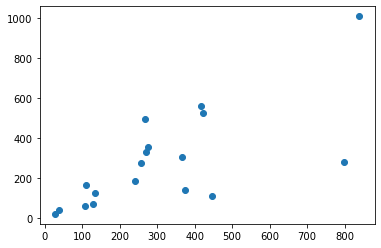

In [522]:
plt.scatter(train['likelyreco'],train['totalpay'])

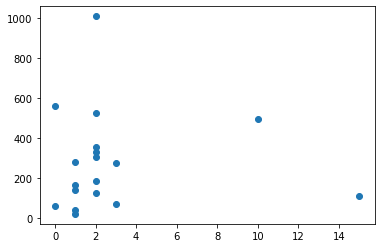

In [523]:
plt.scatter(train['unlikelyreco'],train['totalpay'])

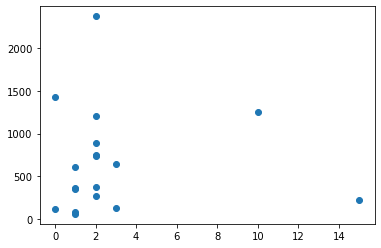

In [524]:
plt.scatter(train['unlikelyreco'],train['important'])

In [531]:
from sklearn.linear_model import LinearRegression
X=pd.DataFrame()
X['likelyreco'] = cov_1[9]+cov_1[10]
X['unlikelyreco'] = cov_1[0]+cov_1[1]
X['important'] = cov_1['very important']
y = pd.DataFrame()
y['totalpay'] = train['totalpay']


In [538]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.score(X, y)


0.9922527936185433

In [541]:
model.coef_

array([[ 0.05094526, -0.49981279,  0.39562537]])

In [590]:
train = train.apply(pd.to_numeric,errors='coerce')
corrMatrix5 = train.corr()
corrMatrix5

,likely_recommend_friends/family,not_likely_recommend_friends/family,important_to_have_good_product_features,pay_for_audio_video
likely_recommend_friends/family,1.000000,0.113066,0.684157,0.709766
not_likely_recommend_friends/family,0.113066,1.000000,-0.000317,-0.005325
important_to_have_good_product_features,0.684157,-0.000317,1.000000,0.994777
pay_for_audio_video,0.709766,-0.005325,0.994777,1.000000


Text(0.5, 1, 'Correlation matrix heatmap between brand health and purchase')

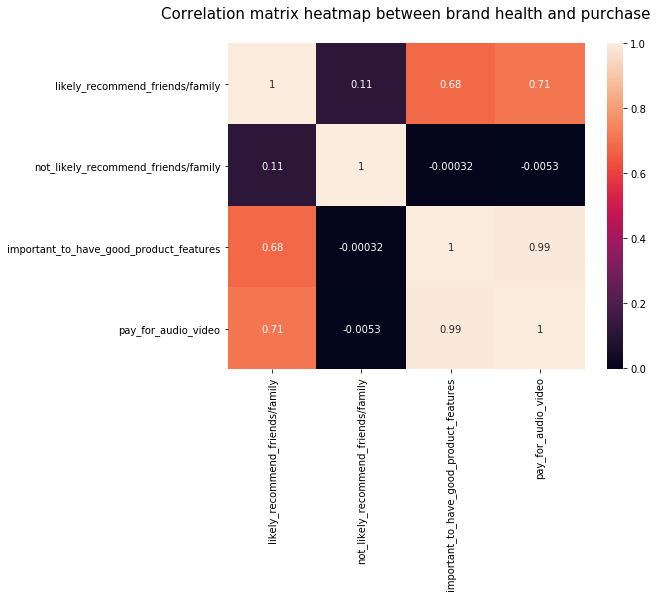

In [599]:
#plt.subplots(figsize=(10,8))
#sns.heatmap(corrMatrix5, annot=True)

plt.subplots(figsize=(8,6))
ax = plt.axes()
#plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix5, ax = ax,annot=True)
#plt.title('Heatmap of Flighr Dataset', fontsize = 20)
ax.set_title('Correlation matrix heatmap between brand health and purchase',fontsize=15,pad=25)



In [614]:
v2_9_14 =  pd.DataFrame(columns=['date','feature1/agree','feature2/agree','feature3/agree','feature4/agree','feature5/agree','feature6/agree','# statement agree','sxm customer','pandora customer','non-customer'])


In [615]:
date_columns = [11142018,11152018,11162018,11192018,11212018,11242018,11252018,11262018,11272018]
for i,j in zip(range(0,9),date_columns):
    v2_9_14.loc[i,'date'] = j 

In [639]:
for c,k in zip(range(0,9),date_columns):
    v2_9_14.iloc[c, 1] = (len(df[(df['A2.9_1'] == 5 ) & (df['StartDate']==k)])/
                         len(df[(df['A2.9_1']> 0 ) &(df['A2.9_1']<6) & (df['StartDate']==k)]))
    
    v2_9_14.iloc[c, 2] = (len(df[(df['A2.9_2'] == 5 ) & (df['StartDate']==k)])/
                          len(df[(df['A2.9_2']> 0 ) &(df['A2.9_2']<6) & (df['StartDate']==k)]))
    
    
    v2_9_14.iloc[c, 3] =  (len(df[(df['A2.9_3'] == 5 ) & (df['StartDate']==k)])/
                          len(df[(df['A2.9_3']> 0 ) &(df['A2.9_3']<6) & (df['StartDate']==k)]))
    
    v2_9_14.iloc[c, 4] = (len(df[(df['A2.9_4'] == 5 ) & (df['StartDate']==k)])/
                          len(df[(df['A2.9_4']> 0 ) &(df['A2.9_4']<6) & (df['StartDate']==k)]))  
    
    v2_9_14.iloc[c, 5] = (len(df[(df['A2.9_5'] == 5 ) & (df['StartDate']==k)])/
                         len(df[(df['A2.9_5']> 0 ) &(df['A2.9_5']<6) & (df['StartDate']==k)]))  
    
    v2_9_14.iloc[c, 6] = (len(df[(df['A2.9_6'] == 5 ) & (df['StartDate']==k)])/
                         len(df[(df['A2.9_6']> 0 ) &(df['A2.9_6']<6) & (df['StartDate']==k)])) 
    
    v2_9_14.iloc[c, 7] = ((len(df[(df['A2.9_1'] == 5 ) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_2'] == 5 ) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_3'] == 5 ) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_4'] == 5 ) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_5'] == 5 ) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_6'] == 5 ) & (df['StartDate']==k)]))/
                         (
                         len(df[(df['A2.9_1']> 0 ) &(df['A2.9_1']<6) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_2']> 0 ) &(df['A2.9_2']<6) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_3']> 0 ) &(df['A2.9_3']<6) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_4']> 0 ) &(df['A2.9_4']<6) & (df['StartDate']==k)])+
                         len(df[(df['A2.9_5']> 0 ) &(df['A2.9_5']<6) & (df['StartDate']==k)])+  
                         len(df[(df['A2.9_6']> 0 ) &(df['A2.9_6']<6) & (df['StartDate']==k)])
                        ))
    v2_9_14.iloc[c, 8] = (len(df[(df['A1.5'] == '1' ) & (df['StartDate']==k)])/
                         len(df[(df['A1.5']> '0' ) &(df['A1.5']<'6') & (df['StartDate']==k)])) 
    
    v2_9_14.iloc[c, 9] = (len(df[(df['A2.1_2'] == '1' ) & (df['StartDate']==k)])/
                         
                         (len(df[(df['A2.1_1']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_2']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_3']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_4']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_5']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_7']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_8']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_9']== '1' )  & (df['StartDate']==k)])+
                          len(df[(df['A2.1_10']== '1' )  & (df['StartDate']==k)])
                         
                         
                         ))
    
    v2_9_14.iloc[c, 10] = (len(df[(df['A1.5'] > '1' ) & (df['StartDate']==k)])/
                         len(df[(df['A1.5']> '0' ) &(df['A1.5']<'6') & (df['StartDate']==k)]))
    
#print (c,k)
v2_9_14

,date,feature1/agree,feature2/agree,feature3/agree,feature4/agree,feature5/agree,feature6/agree,# statement agree,sxm customer,pandora customer,non-customer
0,11142018,67.0,54.0,47.0,50.0,71.0,62.0,351.0,69.0,37.0,52.0
1,11152018,400.0,351.0,247.0,264.0,429.0,386.0,2077.0,283.0,278.0,478.0
2,11162018,53.0,50.0,36.0,43.0,63.0,65.0,310.0,28.0,57.0,104.0
3,11192018,48.0,40.0,30.0,31.0,40.0,43.0,232.0,47.0,39.0,53.0
4,11212018,156.0,130.0,78.0,82.0,179.0,155.0,780.0,95.0,132.0,191.0
5,11242018,4.0,4.0,2.0,2.0,7.0,5.0,24.0,9.0,3.0,2.0
6,11252018,32.0,23.0,10.0,14.0,34.0,38.0,151.0,50.0,24.0,7.0
7,11262018,1.0,1.0,0.0,1.0,2.0,2.0,7.0,2.0,1.0,0.0
8,11272018,35.0,28.0,20.0,22.0,34.0,38.0,177.0,54.0,30.0,22.0


In [611]:
len(df[(df['A2.9_1'] == 5 ) & (df['StartDate']==11142018)])/len(df[(df['A2.9_1']> 0 ) &(df['A2.9_1']<6) & (df['StartDate']==11142018)])

0.5630252100840336

In [610]:
len(df[(df['A2.9_1']> 0 ) &(df['A2.9_1']<6) & (df['StartDate']==11142018)])

119

In [622]:
(len(df[(df['A1.5'] == '1' ) & (df['StartDate']==11142018)])/
 len(df[(df['A1.5']> '0' ) &(df['A1.5']< '6') & (df['StartDate']==11142018)]))

0.5702479338842975

In [641]:
v2_9_14 = v2_9_14.apply(pd.to_numeric,errors='coerce')
trainv1 = v2_9_14.drop(['date'],axis=1)
corrMatrix6 = trainv1.corr()
corrMatrix6

,feature1/agree,feature2/agree,feature3/agree,feature4/agree,feature5/agree,feature6/agree,# statement agree,sxm customer,pandora customer,non-customer
feature1/agree,1.000000,0.999553,0.995556,0.994891,0.998920,0.999044,0.999616,0.984467,0.993011,0.990486
feature2/agree,0.999553,1.000000,0.996905,0.996570,0.998411,0.998981,0.999859,0.982269,0.992703,0.992870
feature3/agree,0.995556,0.996905,1.000000,0.999728,0.992353,0.993619,0.997070,0.983982,0.982563,0.987605
feature4/agree,0.994891,0.996570,0.999728,1.000000,0.991919,0.993780,0.996826,0.983209,0.982409,0.988091
feature5/agree,0.998920,0.998411,0.992353,0.991919,1.000000,0.999157,0.998706,0.977924,0.994995,0.992126
feature6/agree,0.999044,0.998981,0.993619,0.993780,0.999157,1.000000,0.999191,0.980809,0.995522,0.992921
# statement agree,0.999616,0.999859,0.997070,0.996826,0.998706,0.999191,1.000000,0.983080,0.992519,0.992293
sxm customer,0.984467,0.982269,0.983982,0.983209,0.977924,0.980809,0.983080,1.000000,0.963421,0.954924
pandora customer,0.993011,0.992703,0.982563,0.982409,0.994995,0.995522,0.992519,0.963421,1.000000,0.994771
non-customer,0.990486,0.992870,0.987605,0.988091,0.992126,0.992921,0.992293,0.954924,0.994771,1.000000


Text(0.5, 1, 'Correlation matrix heatmap between brand health and purchase')

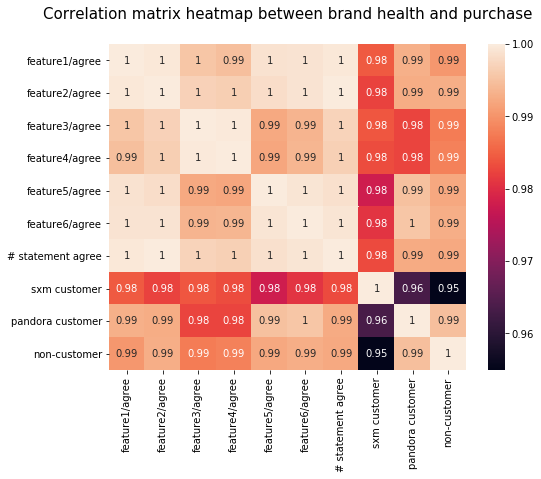

In [642]:
plt.subplots(figsize=(8,6))
ax = plt.axes()
#plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix6, ax = ax,annot=True)
#plt.title('Heatmap of Flighr Dataset', fontsize = 20)
ax.set_title('Correlation matrix heatmap between brand health and purchase',fontsize=15,pad=25)
